In [2]:
import numpy as np
import os
import mediapipe as mp
import time

DATA_PATH = os.path.join('SIBI Dataset')
actions = np.array([folder for folder in os.listdir(DATA_PATH)])

In [3]:
label_map = {label:num for num, label in enumerate(actions)}

dataset, labels = [], []
for action in actions:
    for data in range(len(os.listdir(os.path.join(DATA_PATH, action)))):
        res = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(data)), allow_pickle=True)
        dataset.append(res)
        labels.append(label_map[action])

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
        
X = np.array(dataset)
X = X.reshape(X.shape[0], 1, X.shape[1])

y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

startTime = time.time()
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=300, callbacks=[tb_callback])
endTime = time.time()
print("Training Duration: ", endTime - startTime)

model.save('SIBI.h5')
predictions = model.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
acc = accuracy_score(y_test2, predictions)

Epoch 1/300
56/56 [==============================] - 8s 21ms/step - loss: 3.1767 - categorical_accuracy: 0.0423 - val_loss: 3.1765 - val_categorical_accuracy: 0.1117
Epoch 2/300
56/56 [==============================] - 0s 7ms/step - loss: 3.1183 - categorical_accuracy: 0.0830 - val_loss: 3.0850 - val_categorical_accuracy: 0.0964
Epoch 3/300
56/56 [==============================] - 0s 6ms/step - loss: 2.6223 - categorical_accuracy: 0.1727 - val_loss: 2.2394 - val_categorical_accuracy: 0.2690
Epoch 4/300
56/56 [==============================] - 0s 7ms/step - loss: 2.0728 - categorical_accuracy: 0.2940 - val_loss: 1.8930 - val_categorical_accuracy: 0.3401
Epoch 5/300
56/56 [==============================] - 0s 6ms/step - loss: 1.7524 - categorical_accuracy: 0.3843 - val_loss: 1.6356 - val_categorical_accuracy: 0.4619
Epoch 6/300
56/56 [==============================] - 0s 7ms/step - loss: 1.4802 - categorical_accuracy: 0.4650 - val_loss: 1.3592 - val_categorical_accuracy: 0.4924
Epoch 7/3

C:\Users\leozh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1s 4ms/step


16/16 [==============================] - 0s 5ms/step
Accuracy: 0.9614604462474645
Precision Score: 0.9631590062105801
Recall Score: 0.9614604462474645
F1 Score: 0.9615584140448612
Classification Report:               precision    recall  f1-score   support

           A       1.00      1.00      1.00        23
           B       0.91      1.00      0.95        21
           C       0.95      1.00      0.97        19
           D       0.95      0.95      0.95        19
           E       0.96      1.00      0.98        25
           F       1.00      0.91      0.95        23
           G       1.00      1.00      1.00        19
           H       1.00      1.00      1.00        32
           I       1.00      0.94      0.97        17
           K       0.95      0.90      0.92        20
           L       1.00      0.97      0.98        29
           M       0.95      0.95      0.95        22
           N       1.00      0.95      0.97        19
           O       1.00      1.00      1

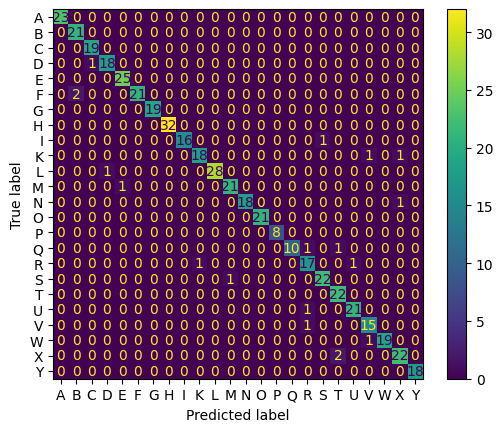

In [7]:
predictions = model.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)
print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")

print(f"Classification Report: {classification_report(y_test2, predictions, target_names=actions)}")

print(f"Confusion Matrix:\n")
display.plot()


77/77 [==============================] - 1s 6ms/step
Accuracy: 0.9800974817221771
Precision Score: 0.9805495377926596
Recall Score: 0.9800974817221771
F1 Score: 0.9801351377596798
Confusion Matrix:



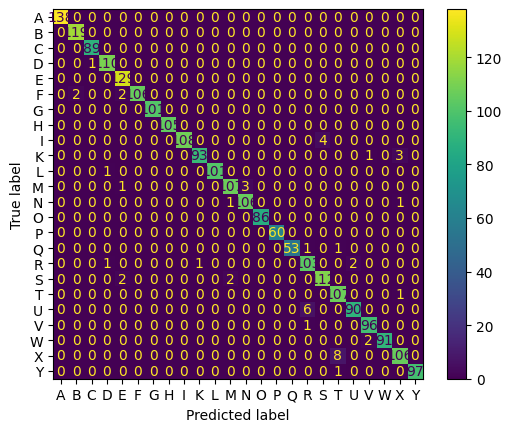

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score

predictions = model.predict(X)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)
print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")

print(f"Confusion Matrix:\n")
display.plot()


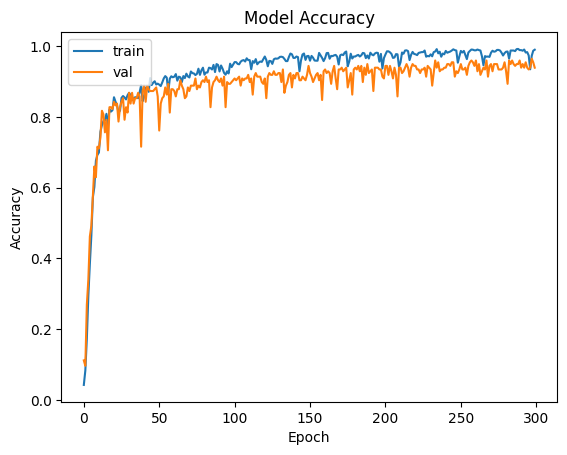

In [14]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

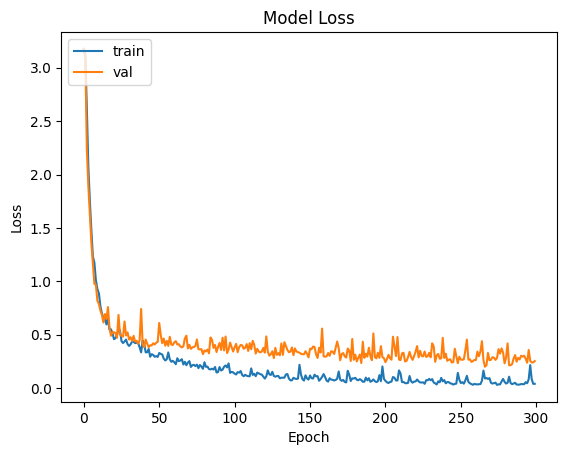

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()